In [2]:
# import splitfolders

# splitfolders.ratio("6 Emotions for image classification", output="dataset",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

In [1]:
import tensorflow as tf

# Check if TensorFlow is using GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import os
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [3]:
os.chdir('C:/Users/sayus/Desktop/Deep Learning/Neural Network/Emotion Detection/dataset')
dir=os.getcwd()
dir

'C:\\Users\\sayus\\Desktop\\Deep Learning\\Neural Network\\Emotion Detection\\dataset'

In [4]:
train_data = os.path.join('train')
test_data = os.path.join('test')

In [5]:
files = os.listdir(train_data)
print(files[:])

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


## CNN model for training

In [6]:
base_model = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [7]:
# base_model.trainable=False

In [8]:
input_tensor=base_model.layers[0].input
output_tensor=base_model.layers[-2].output

In [9]:
output_tensor

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [10]:
final_output=tf.keras.layers.Flatten()(output_tensor)
final_output=tf.keras.layers.Dense(1024)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(512)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(128)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_3')>

In [11]:
model=tf.keras.Model(inputs =input_tensor,outputs=final_output)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

In [14]:
model.compile(loss = 'categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

test_gen = ImageDataGenerator(rescale = 1/255)
test_data_gen = test_gen.flow_from_directory(test_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [16]:
categories = list(train_data_gen.class_indices.keys())
keys = list(train_data_gen.class_indices.keys())
values = list(train_data_gen.class_indices.values())
print(keys)
print(values)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
[0, 1, 2, 3, 4, 5, 6]


In [17]:
# steps_per_epoch = train_data_gen.samples // train_data_gen.batch_size
# validation_steps = val_data_gen.samples // val_data_gen.batch_size

In [18]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=1000,epochs=80,validation_data=test_data_gen, verbose=2,callbacks=[early_stopping], batch_size=10 )


Epoch 1/80
1000/1000 - 575s - loss: 1.7523 - accuracy: 0.2876 - val_loss: 1.4570 - val_accuracy: 0.4752 - 575s/epoch - 575ms/step
Epoch 2/80
1000/1000 - 468s - loss: 1.4758 - accuracy: 0.4343 - val_loss: 1.3039 - val_accuracy: 0.5084 - 468s/epoch - 468ms/step
Epoch 3/80
1000/1000 - 376s - loss: 1.3828 - accuracy: 0.4719 - val_loss: 1.2453 - val_accuracy: 0.5343 - 376s/epoch - 376ms/step
Epoch 4/80
1000/1000 - 351s - loss: 1.3012 - accuracy: 0.5150 - val_loss: 1.1489 - val_accuracy: 0.5658 - 351s/epoch - 351ms/step
Epoch 5/80
1000/1000 - 351s - loss: 1.2549 - accuracy: 0.5391 - val_loss: 1.0839 - val_accuracy: 0.5971 - 351s/epoch - 351ms/step
Epoch 6/80
1000/1000 - 356s - loss: 1.2225 - accuracy: 0.5470 - val_loss: 1.1552 - val_accuracy: 0.5715 - 356s/epoch - 356ms/step
Epoch 7/80
1000/1000 - 352s - loss: 1.1882 - accuracy: 0.5665 - val_loss: 1.0916 - val_accuracy: 0.5886 - 352s/epoch - 352ms/step
Epoch 8/80
1000/1000 - 352s - loss: 1.1655 - accuracy: 0.5685 - val_loss: 1.0403 - val_acc

In [23]:
model.evaluate(test_data_gen)

718/718 [==============================] - 59s 81ms/step - loss: 0.9359 - accuracy: 0.6562


[0.9359118342399597, 0.6561716198921204]

In [24]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.28760001063346863, 0.4343000054359436, 0.47189998626708984, 0.5149999856948853, 0.5390999913215637, 0.5469546914100647, 0.5664566159248352, 0.5684999823570251, 0.583299994468689, 0.599399983882904, 0.6015999913215637, 0.6115611791610718, 0.6114000082015991, 0.6096609830856323, 0.6220622062683105, 0.6305630803108215, 0.6270626783370972, 0.636900007724762, 0.6327000260353088, 0.6355000138282776, 0.6403640508651733, 0.6518999934196472, 0.6508650779724121, 0.6570656895637512]
[0.4752019941806793, 0.508358895778656, 0.5342713594436646, 0.5657564997673035, 0.5971022844314575, 0.5714683532714844, 0.5886040925979614, 0.6090832948684692, 0.6110337376594543, 0.6164669990539551, 0.6262189745903015, 0.607272207736969, 0.6179994344711304, 0.6375035047531128, 0.6287266612052917, 0.6380607485771179, 0.6447478532791138, 0.6437726616859436, 0.6561716198921204, 0.6532460451126099, 0.638200044631958, 0.6556143760681152, 0.638617992401123, 0.6415436267852783]


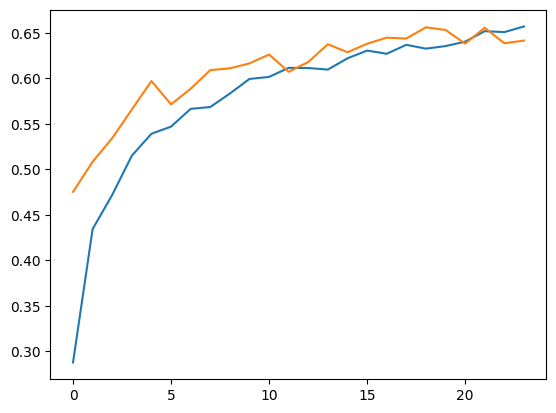

In [25]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(acc )
plt.plot(validation_acc)
plt.show()

1/1 [==============================] - 4s 4s/step
sad
1/1 [==============================] - 0s 33ms/step
happy
1/1 [==============================] - 0s 30ms/step
neutral


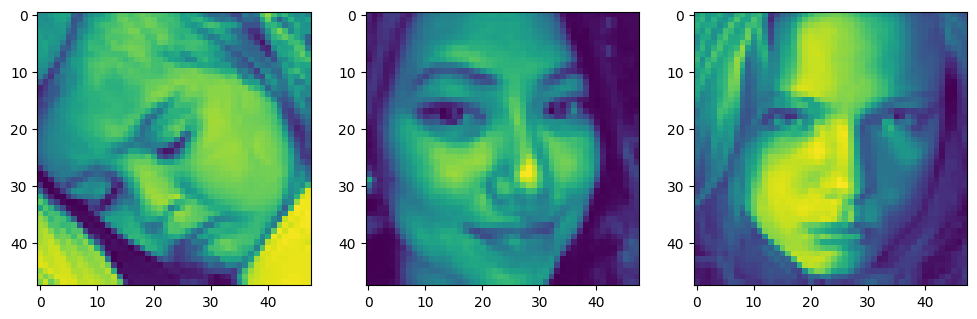

In [27]:
from tensorflow.keras.utils import load_img , img_to_array
uploading_file = os.listdir('new')
cnt = 1
plt.figure(figsize=(12,10))
for fn in uploading_file:
  path = "C:/Users/sayus/Desktop/Deep Learning/Neural Network/Emotion Detection/dataset/new/"+fn
  image = load_img(path , target_size=(299,299))
  x = img_to_array(image)
  x = x/225
  x = np.expand_dims(x , axis=0)

  images = np.vstack([x])
  pred_res = model.predict(images , batch_size=10)
  val_index = values.index(np.argmax(pred_res[0]))
  key_pos = keys[val_index]
  image1 = img.imread("C:/Users/sayus/Desktop/Deep Learning/Neural Network/Emotion Detection/dataset/new/"+fn)
  plt.subplot(1,3 , cnt)
  plt.imshow(image1)
  cnt+=1
  print(key_pos)
